L'dée de ce notebook est de pouvoir tracer les étapes de réalisation d'un calcul de temps de parcours de référence. 

   Chap 0 : Import des données

In [15]:
%load_ext autoreload
%autoreload 2
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import traitement_od as t
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
import numpy as np
import altair as alt
import datetime as dt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Chap 1. Extraction des données sur 48h

In [2]:
df_journee=t.ouvrir_fichier_lapi('2019-01-29 00:00:00','2019-01-30 23:59:00')#telecharger une partie des donnees sur unejournee

In [8]:
info_df_journee=t.df_source(df_journee)

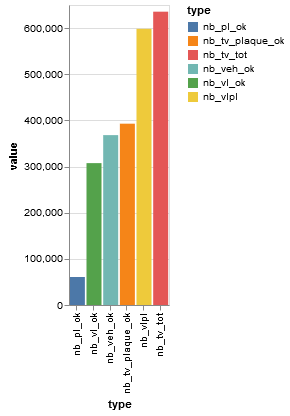

In [9]:
#graphes
graph_stat, graph_fiab=info_df_journee.plot_graphs()
#stats sur la journée
graph_stat

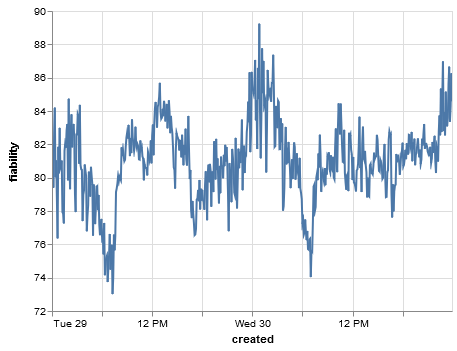

In [10]:
#fiabilité moyenne par tranche de 5 min (graph interactif)
graph_fiab

Chap 2. Trouver les échanges directs et indirects entre 2 caméras pour une tranche horaire de départ données

    Chap 2.1. Trouver les échanges directs

In [28]:
#On utilise la classe trajet_direct
direct_cam_19_5=t.trajet_direct(df_journee, '2019-01-29 08:00:00', 60, 2, 19, 5, avecGraph=True) #True pour pouvoir faire des graphs

In [1]:
direct_cam_19_5.df_tps_parcours_pl_final.head(5)

NameError: name 'direct_cam_19_5' is not defined

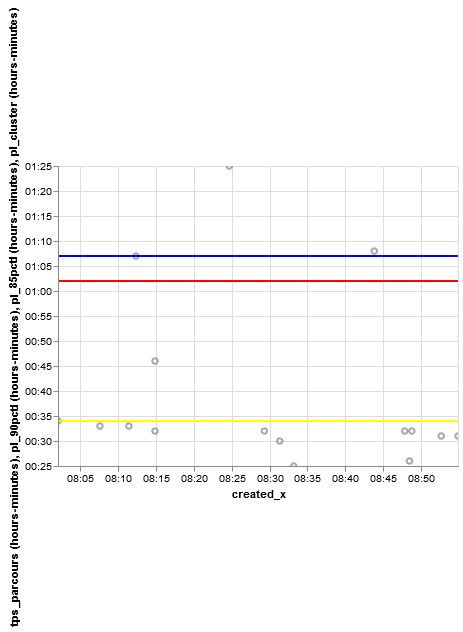

In [6]:
#cette instance contient bcp d'attribut : 
# - de comptage de veh
# - de Dataframes (intermediaires et finalles)
# - de graphs
direct_cam_19_5.graph_prctl

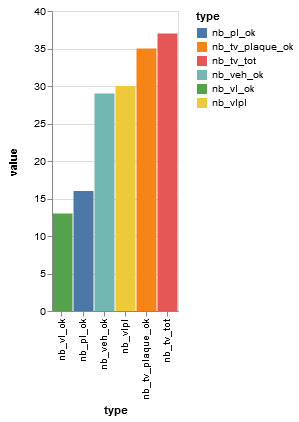

In [7]:
direct_cam_19_5.graph_stat_trie

    Chap 2.2. Trouver les échanges indirects

In [30]:
#et on reutilie la classe df_tps_parcours, qui ne renvoi que les immat qui passent directement par la seconde cameras 
#on pourrait utiliser les données de temps max collectées par les échanges indirect pour limiter les données, là je laisse la possibilité de prendre 16h plus tard
indirect_cam19_5=t.trajet_indirect(df_journee,'2019-01-29 08:00:00', 60, 16,[19,4,5])

In [10]:
#cet objet renvoi une df finale et un dico composé des trajets directs
indirect_cam19_5.dico_traj_directs

{'trajet0': <traitement_od.trajet_direct at 0x1db83bcd160>,
 'trajet1': <traitement_od.trajet_direct at 0x1db83bcd470>}

In [31]:
indirect_cam19_5.df_transit.head(5)

,immat,date_cam_1,date_cam_2,cam_1,cam_2,tps_parcours,cameras
0,bf9dfd50a4a693085e3080156f11c25314f96f03,2019-01-29 08:00:56,2019-01-29 08:37:18,19,5,00:36:22,"[19, 4, 5]"
1,cf4f7ddbb3a6d9006e029777df712a53c2d76992,2019-01-29 08:01:07,2019-01-29 08:37:04,19,5,00:35:57,"[19, 4, 5]"
2,183bc8585ac5a2e26b6d2ada6ce6891235a36b92,2019-01-29 08:01:16,2019-01-29 08:37:20,19,5,00:36:04,"[19, 4, 5]"
3,dcf2ffa7638b1ae7d0281cbb94d4c7cf0a0912f7,2019-01-29 08:02:34,2019-01-29 08:37:42,19,5,00:35:08,"[19, 4, 5]"
4,54581cfa0b0f0c1dbe24fd60ca7efcc07439232f,2019-01-29 08:02:19,2019-01-29 08:38:07,19,5,00:35:48,"[19, 4, 5]"


Chap 3. Faire une rechreche sur 1 journee

In [16]:
#récuperer la liste des trajets (importer dans le module à partir d'un fichier) 
t.liste_trajet

,o_d,trajets
0,A63-A10,"[{'cameras': [19, 4, 5], 'type_trajet': 'indirect'}, {'cameras': [19, 1, 5], 'type_trajet': 'indirect'}, {'cameras': [19, 5], 'type_trajet': 'direct'}]"
1,A62-A10,"[{'cameras': [10, 4, 5], 'type_trajet': 'indirect'}, {'cameras': [10, 1, 5], 'type_trajet': 'indirect'}, {'cameras': [10, 5], 'type_trajet': 'direct'}]"


In [21]:
#appel de la fonction de chainage
t.transit_1_jour(df_journee,'2019-01-29',t.liste_trajet)

,immat,date_cam_1,date_cam_2,cam_1,cam_2,tps_parcours,cameras
0,997d5fbf94327159d8ad2dfe88999cf8a1a32fad,2019-01-29 07:41:57,2019-01-29 08:17:44,19,5,00:35:47,"[19, 4, 5]"
1,1da7ad5637f24c08d9a8bb1da3f932c21e8dd47c,2019-01-29 07:45:33,2019-01-29 08:22:36,19,5,00:37:03,"[19, 4, 5]"
2,382ff3d11f92aaa8d00c7e8061ff61c0eecbfc00,2019-01-29 07:53:24,2019-01-29 08:28:22,19,5,00:34:58,"[19, 4, 5]"
3,eb6b0e2bc49e9ea29fb491193621a90417323bf4,2019-01-29 07:54:19,2019-01-29 08:30:39,19,5,00:36:20,"[19, 4, 5]"
4,a7e4a67e8836b4fdb72688baca377534f6add717,2019-01-29 07:56:06,2019-01-29 08:32:54,19,5,00:36:48,"[19, 4, 5]"
5,b3e2b06a429608e99c98d074851e49cbb6fb93ad,2019-01-29 07:56:03,2019-01-29 08:34:34,19,5,00:38:31,"[19, 4, 5]"
6,f25b2cd42e0b20614640abc3418ec2af63af5042,2019-01-29 07:57:56,2019-01-29 08:34:25,19,5,00:36:29,"[19, 4, 5]"
7,2dca9f2506ef4f67da0255625f046d1b40348d6e,2019-01-29 07:58:35,2019-01-29 08:35:20,19,5,00:36:45,"[19, 4, 5]"
8,914a3afe6d6abb263b99c20884c88ae7c8a383dd,2019-01-29 07:59:36,2019-01-29 08:35:38,19,5,00:36:02,"[19, 4, 5]"
9,e1ea2a9b923531745c01143d66eab992b97a2869,2019-01-29 07:56:55,2019-01-29 09:39:25,19,5,01:42:30,"[19, 4, 5]"
